# Amazon EC2


* EC2 is one of the most popular AWS offering
* Infrastructure as a service

### OS

* Linux, Mac, Windows
* How much compute power (CPU)
* How much random-access memory RAM
* How much storage space:
 - Network attached (EBS & EFS)
 - hardware (EC2 instance store)
 
* Network card: Speed of the card, public IP
* Firewall rules: security group
* Boostrap script (configure at first launch)



### EC2 User Data

* It is possible to bootstrap our instances using EC2 User data script
* bootstrapping means launching commands when a machine starts
* That script is only run once, at the instance first start



### EC2 Instance type: 

* Five examples below, thousands available 
![image.png](attachment:image.png



### User data


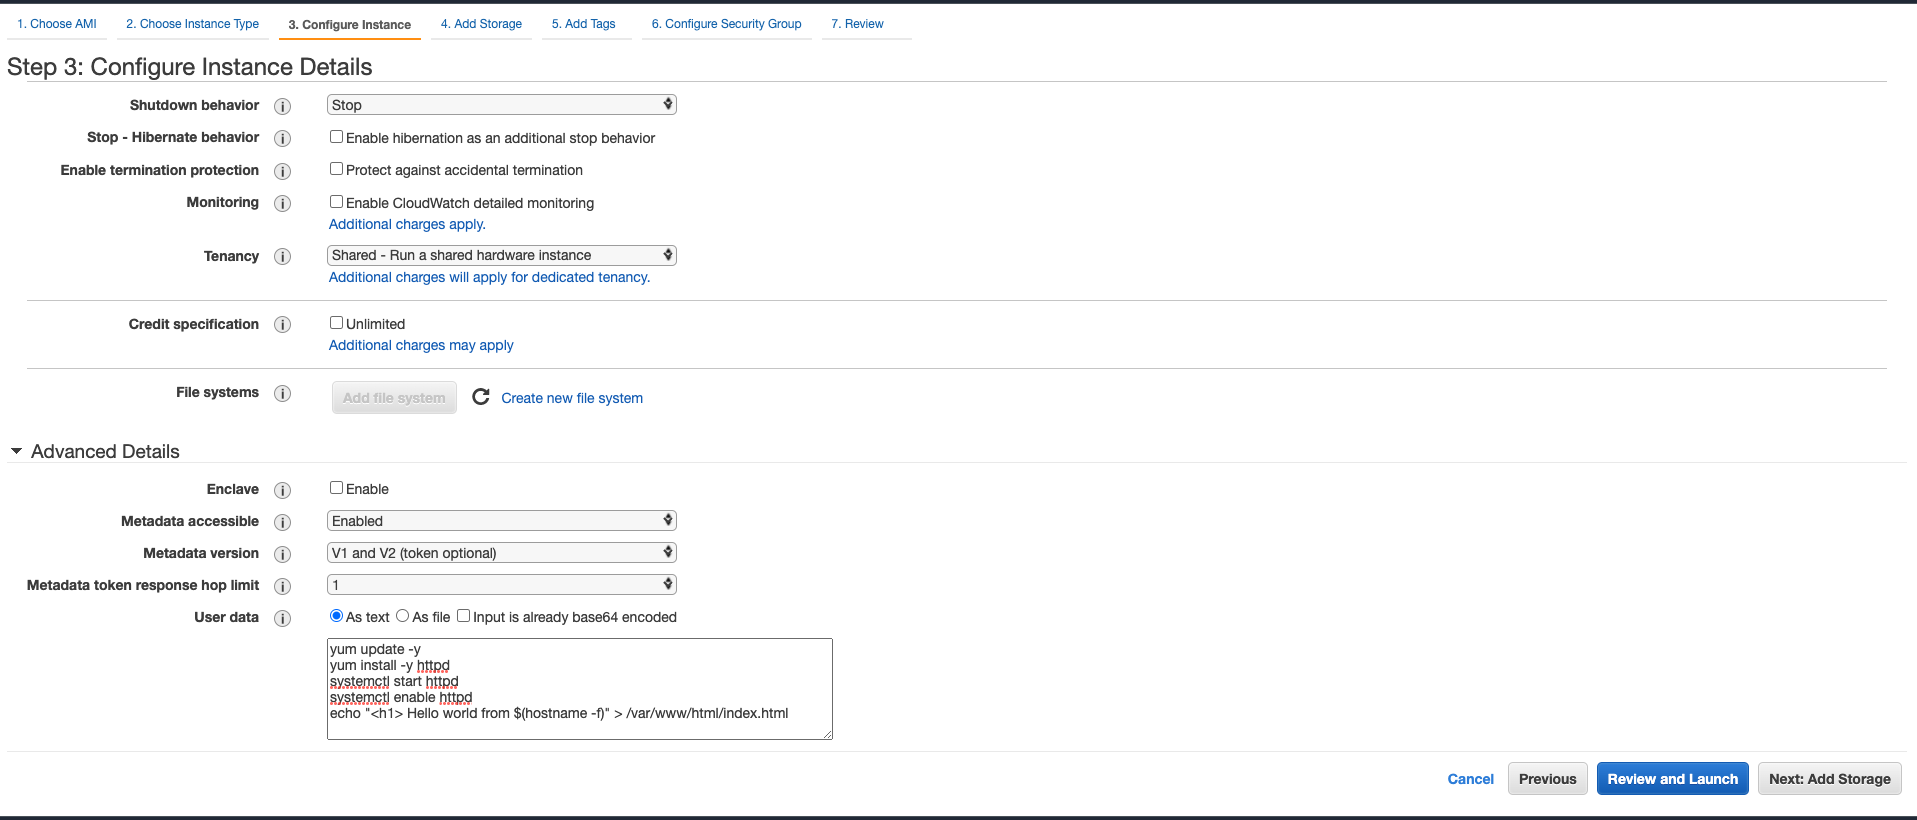


* You can run a bootstrap script to run on instance creation here. 



### Security Groups

* Basically a firewall
* They regulate:

1. Access to ports
2. Authorized IP ranges - Ipv4 to IPv6
3. Control of inbound network (from other instance to our instance)
4. Control of outbound network

* Security Groups are fundamental of network security in AWS
* They control how traffic is allowed into or out of EC2 instances
* Security groups contain only ALLOW rules
* Security groups rules can be reference by IP or by security group


#### Good to know

* Can be attached to multiple instances
* Locked down to region/VPC combination 
* Live outside of Ec2, firewall outside of EC2 instances


#### Referencing other security groups 

* you can basically reference Security groups from security groups. Helps not have to constantly update IPs
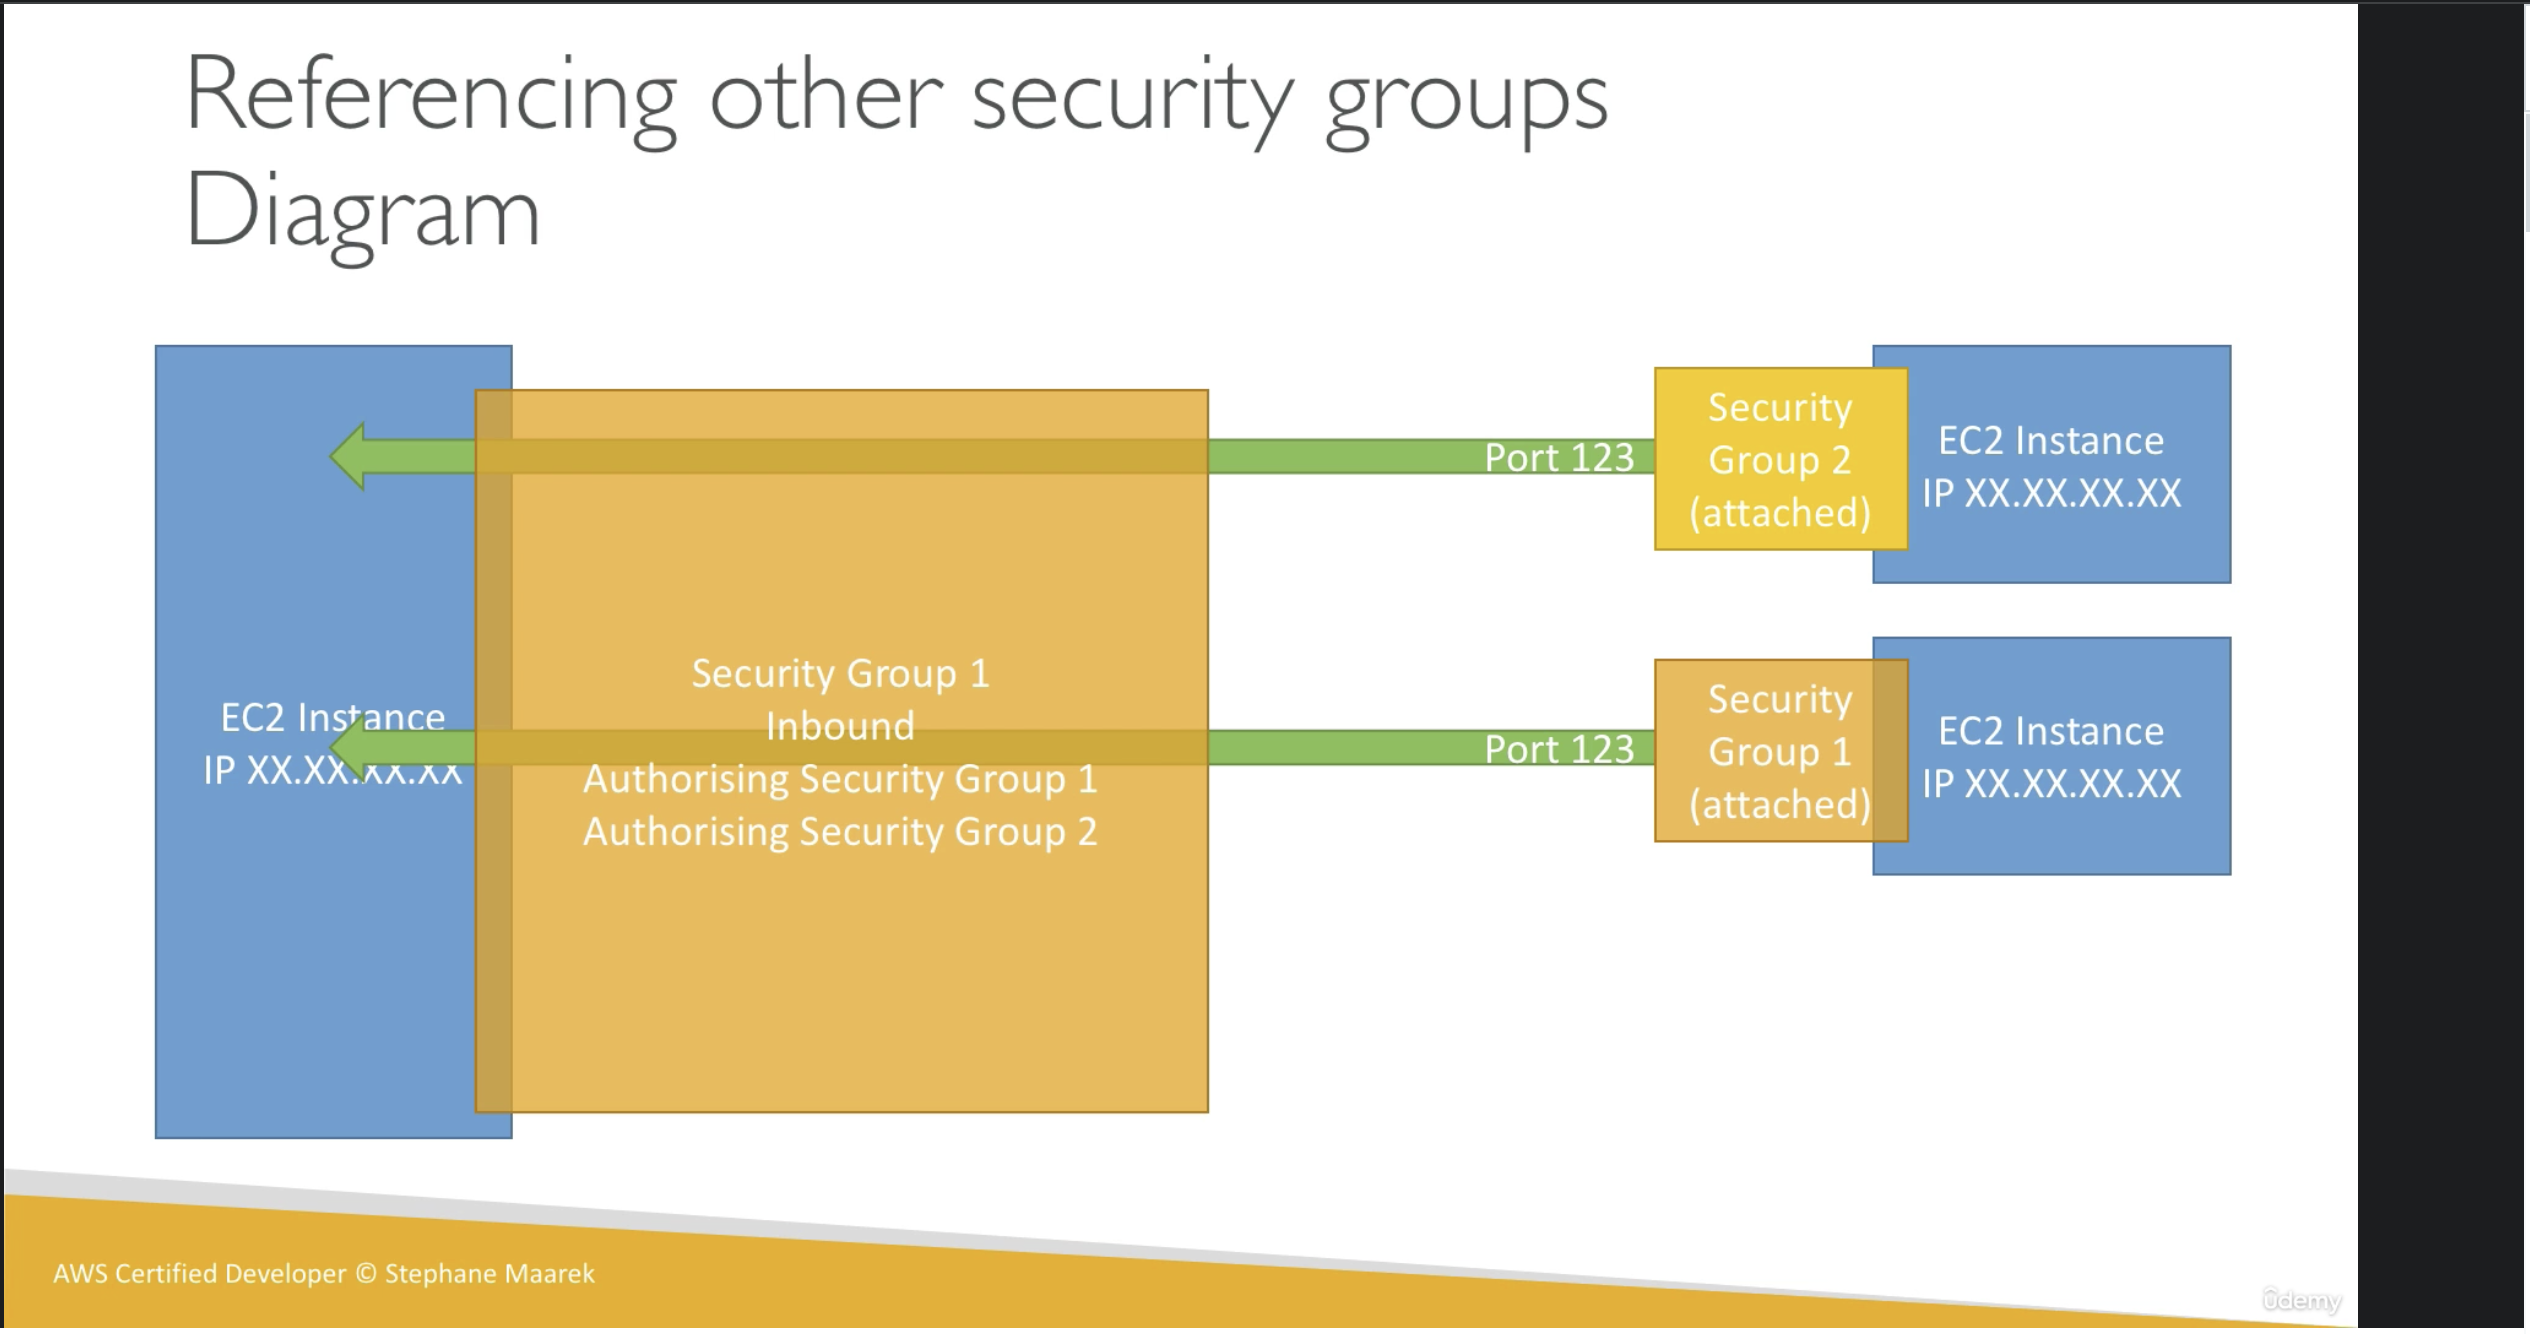


##### Classic Ports

* 22 = SSH - log in
* 21 = FTP - upload files to fileshares
* 22 = SFTP - upload files using ssh
* 80 = HTTP - access unsecured websites
* 443 = HTTPS - access secured websides
* 3389 = RDP for windows instance 


### Public vs Private vs Elastic IP 

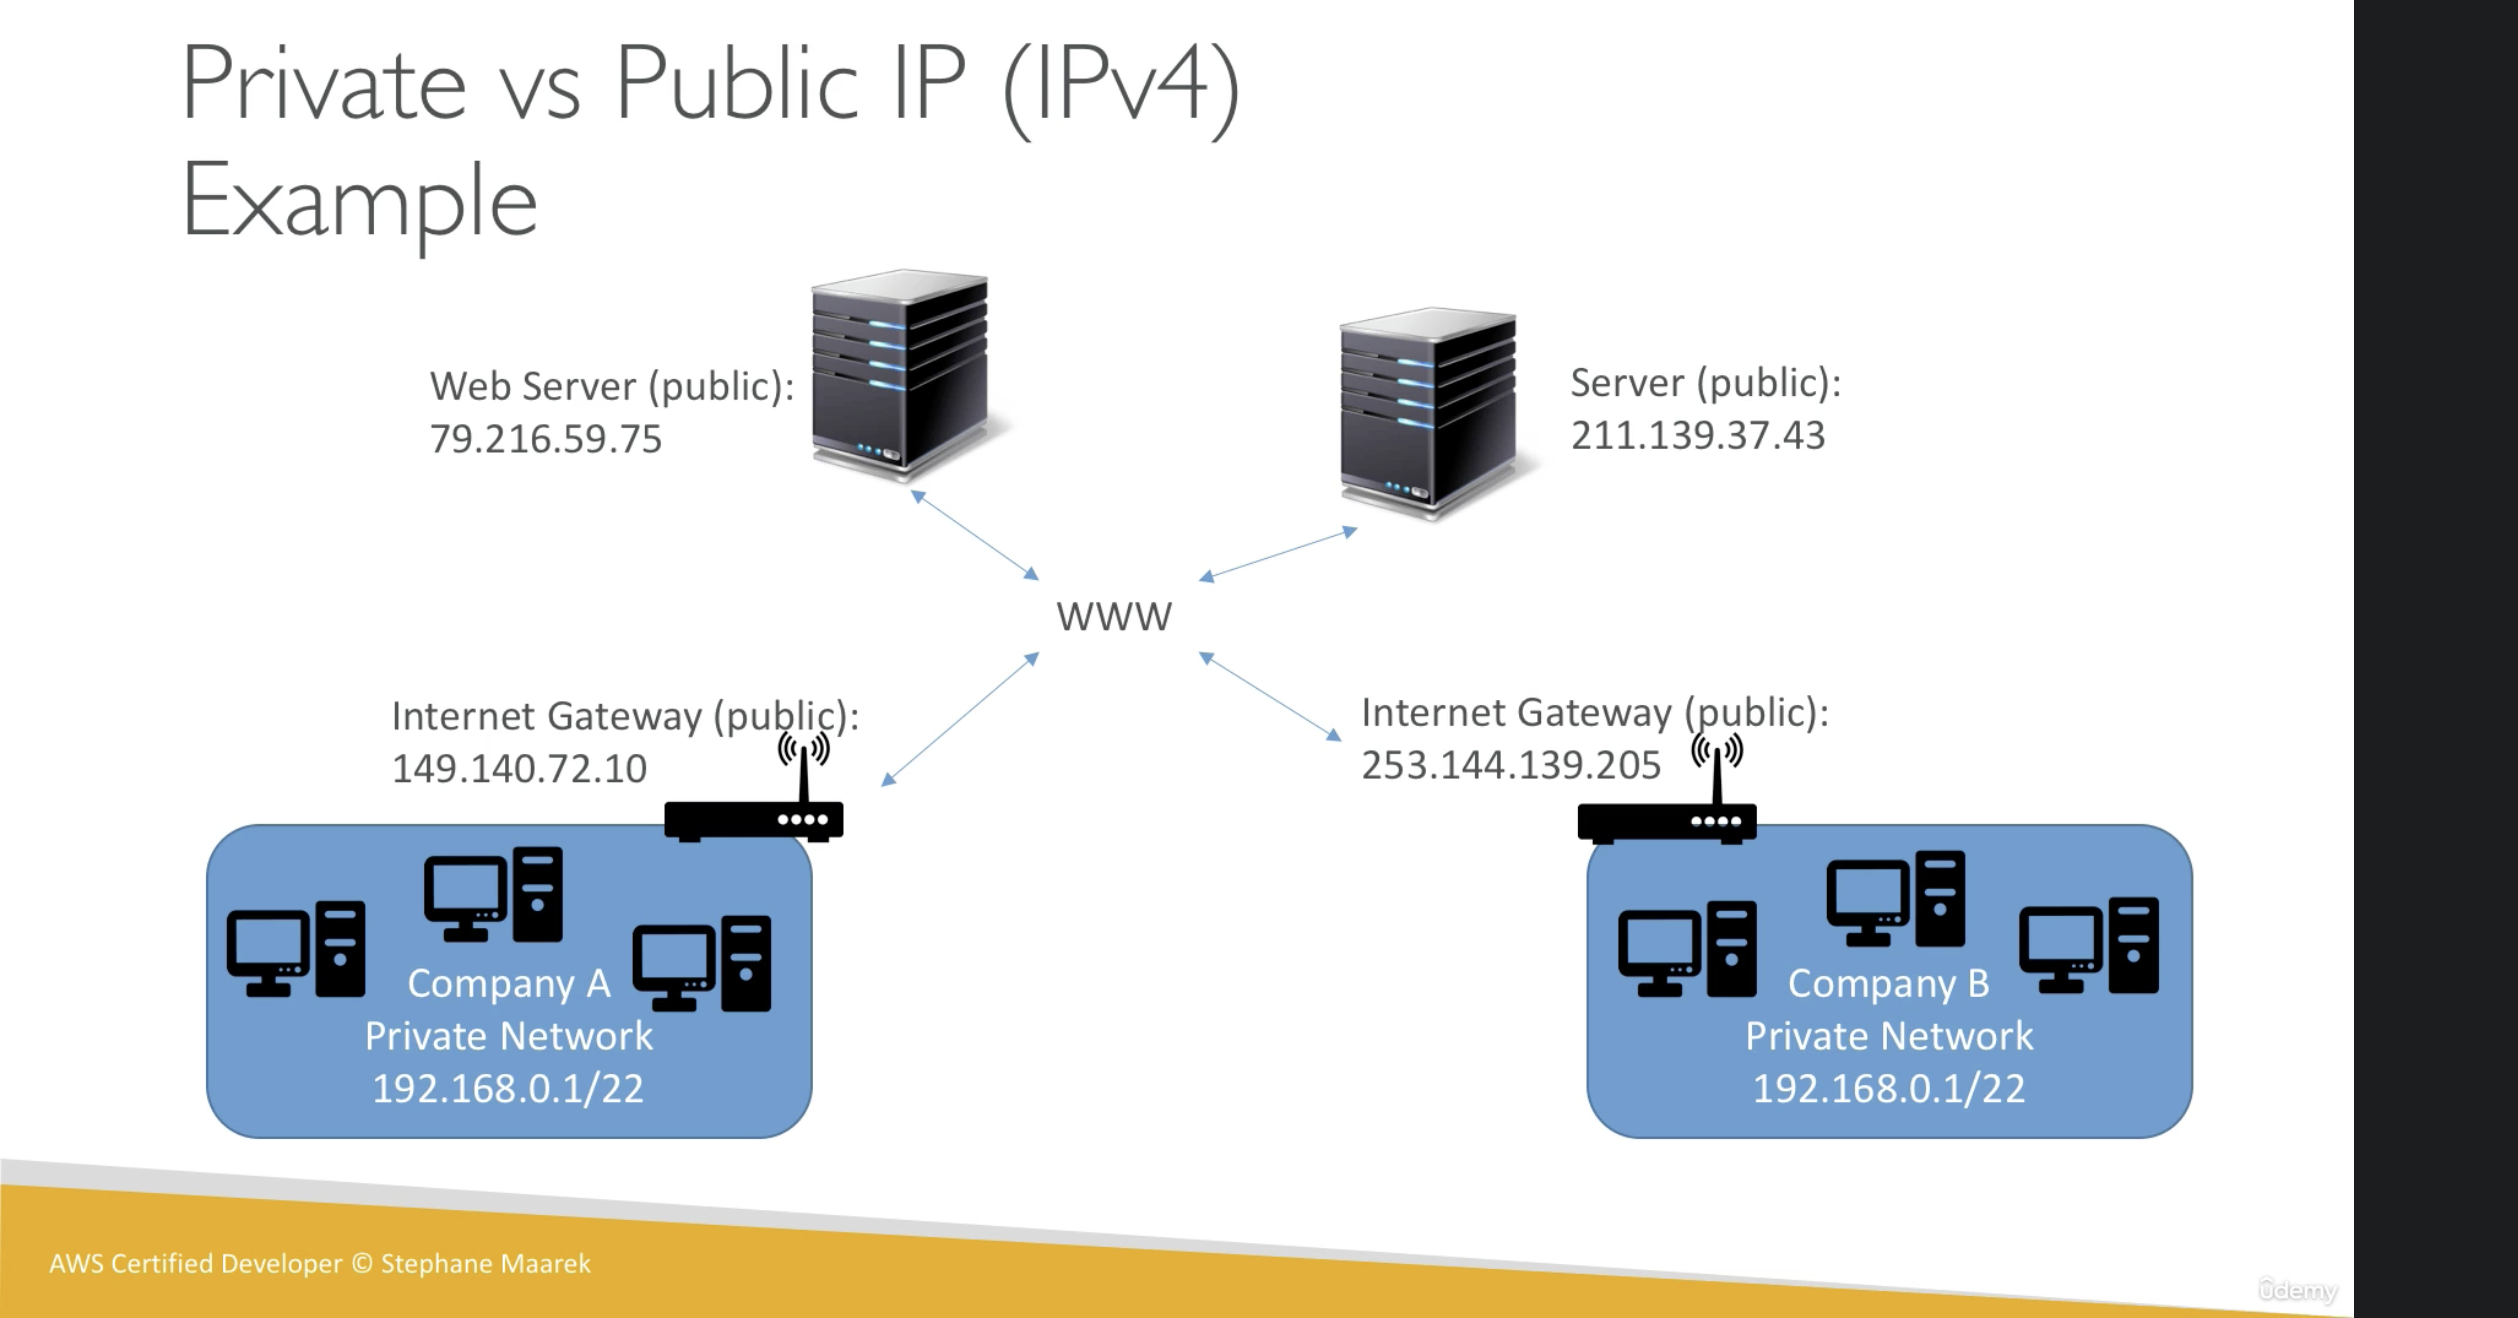



Public IP: 

* Can be identified by the intered (www)
* Must be unique across whole web
* Can be geo-located easily


Private IP
* means the machine can only be idenfied on a private network
* The IP must be unique across the private network
* Machines connect to www using a NAT device 
* only specified range


Elastic IP
* When you stop and start it instance, it changes its public ip
* You need to have a fixed public IP for your instance, you need an Elastic IP
* Elastic IP is a public IPv4 
* With elastic IP address you can mask the failure of an instance or software by remapping the address to another instance
* You have only 5 elastic IPs
* AVOID USING THEM 

##### JUST USE A RANDOM public IP and register a DNS name to it 
##### or use a load balancer and don't use a public IP 


## Placement Group


* Sometimes you want to control over EC2 instance placement strategy

1. Cluster - clusters instances into a low-latency group in a single availability zone (low latency)
2. Spread - spreads instances across hardware - critical applications
3. Partition - Spreads instances across different partitions, which rely on different sets of racks. Scales to 100s of Ec2 instances



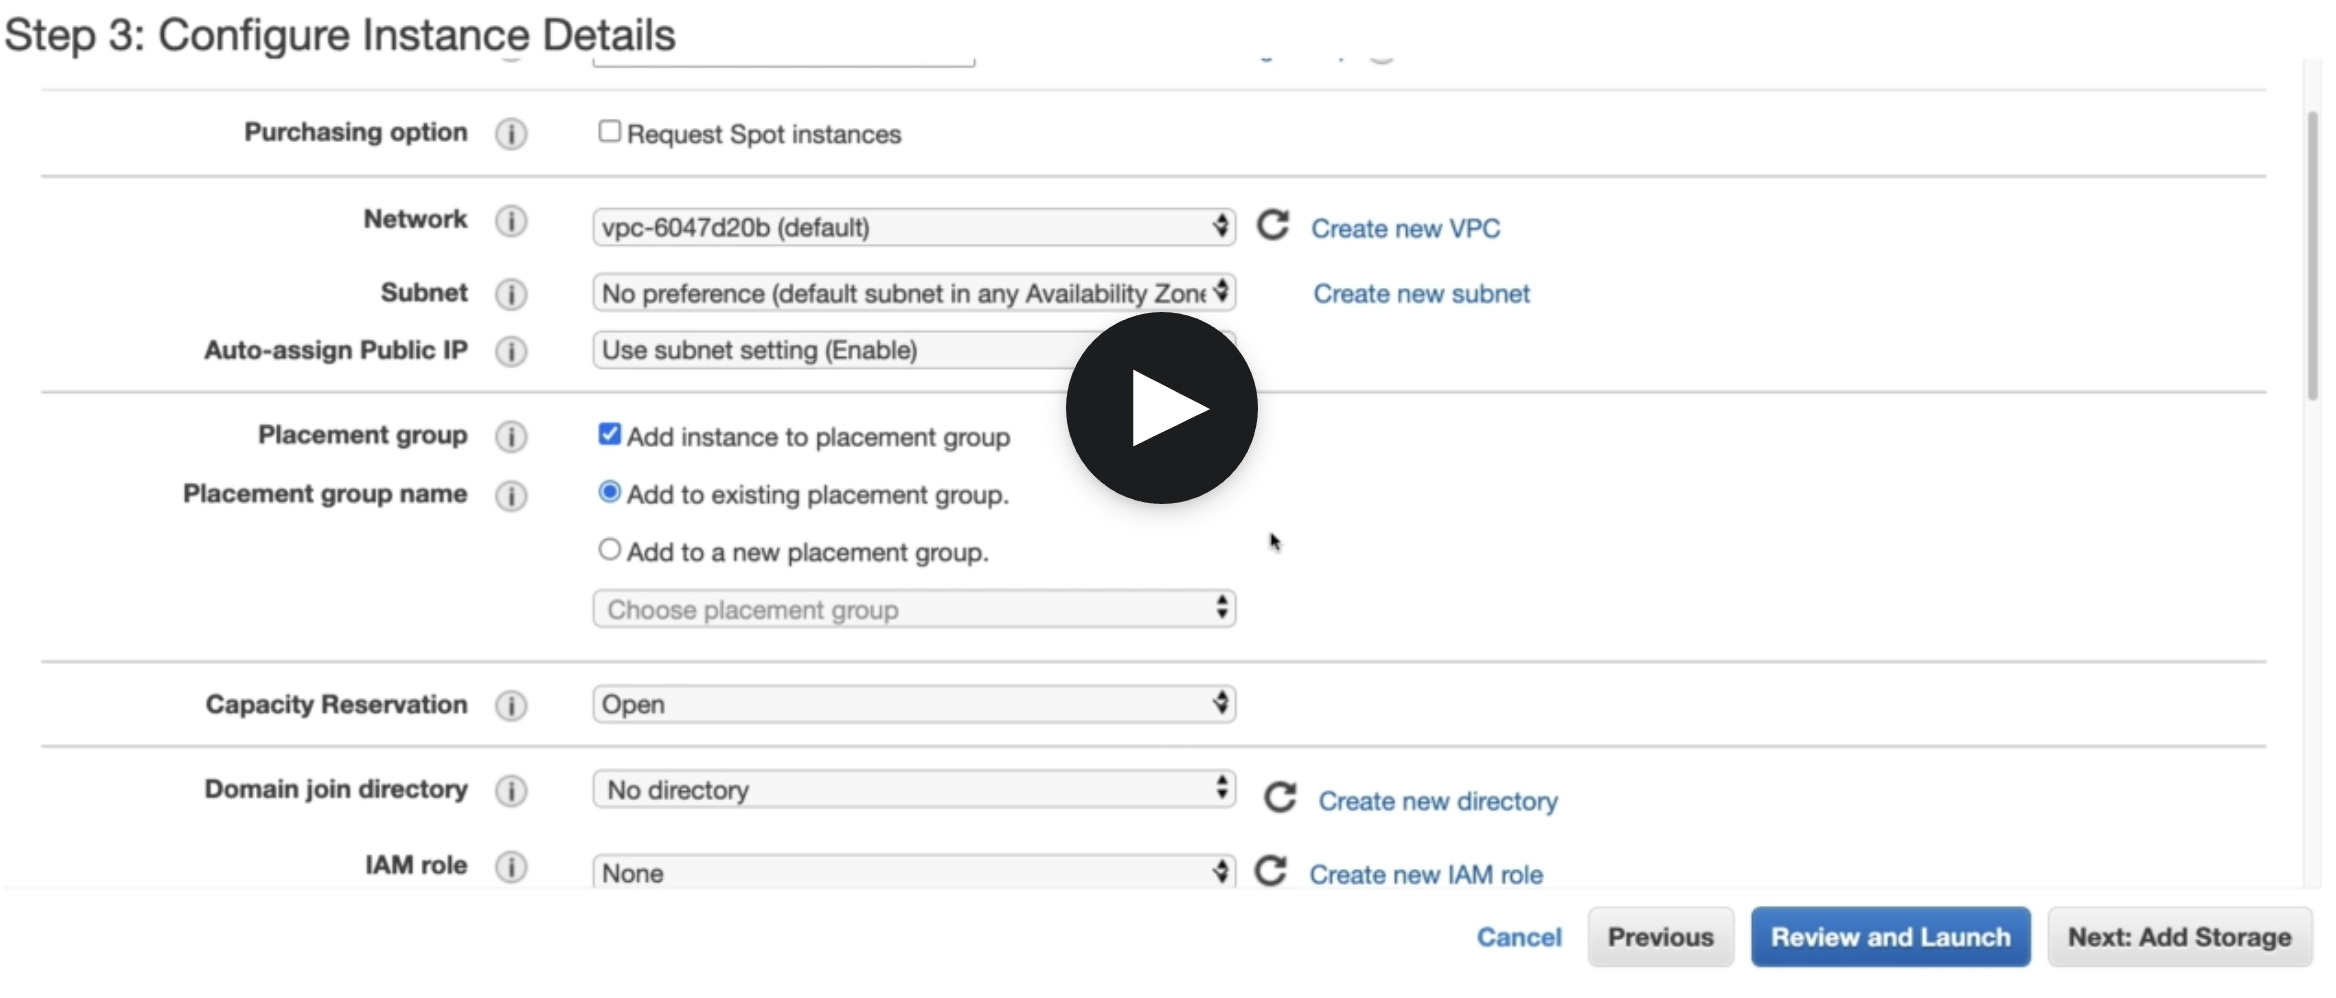
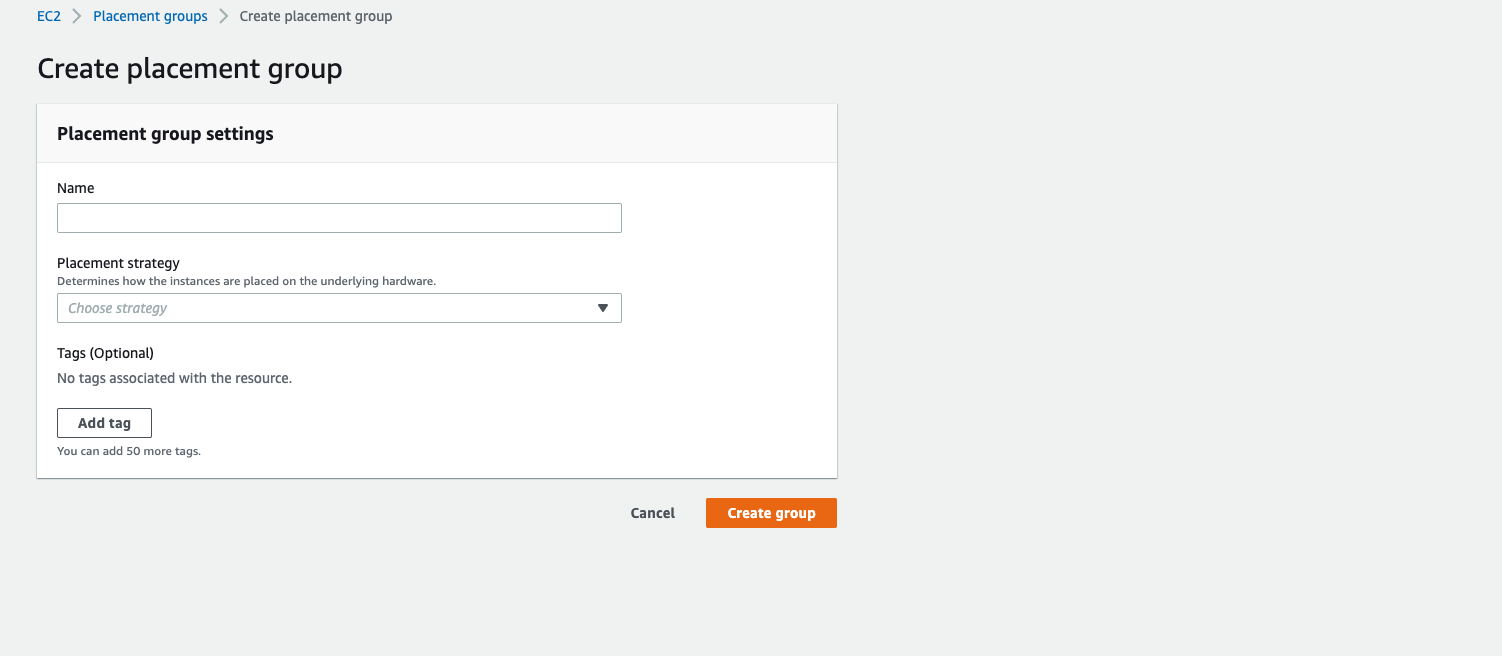

#### Cluster
Pros: Great Network 
Cons: If rack fails, all instances fails at same time
Use case: 
- big data job that needs to b e fast
- application needs low latency and high network throughput

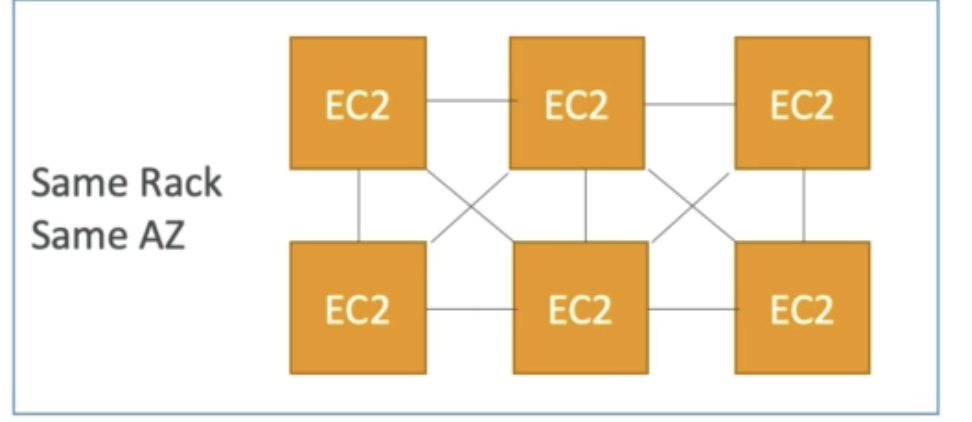


#### Spread
Pros: 
- Fault Tolerance
- Reduced risk of simultaneous failure
- EC2 instances are on different physical hardware

Cons: 
- Limited to 7 instances per AZ
- complete opposite of cluster


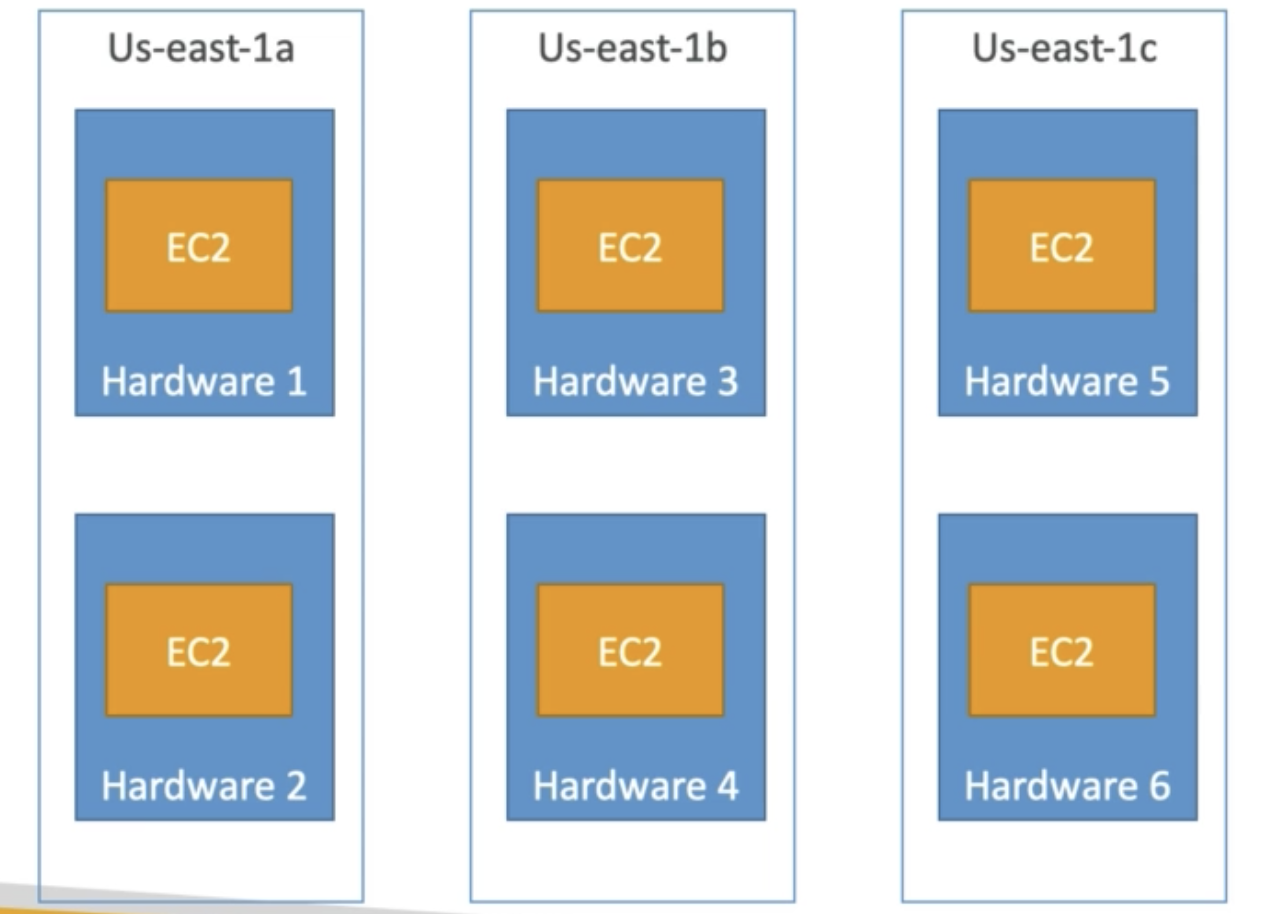



#### Partition Groups
Pros: 
 - Partitions are different racks
 - up to 100s of Ec2 instances
 - Do not share hardware with other partitions
 - You can access Ec2 instances get access to the partition information
 - Use Cases: Big data application, that are partition aware. 




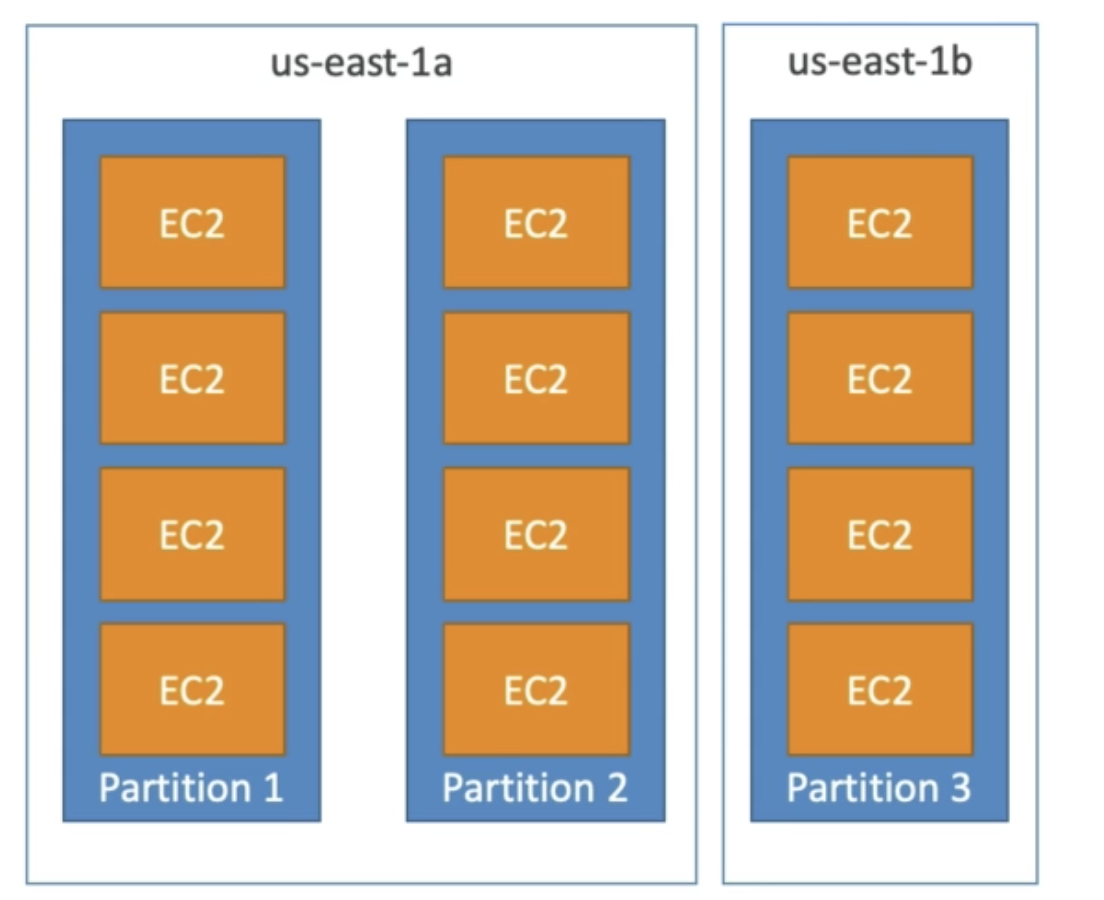

## Elastic Network Interfaces (ENI)

* Logical component in a VPC that represents a virtual network card
* The ENI can have the following attributes:

#### Attributes
1. Primary private IPv4, one or more secondary IPv4
2. One Elastic IP per private Ipv4
3. One public IPV4
4. One or many security groups
5. A MAC address


* You can create ENI independentaly and attach them on the fly on EC2 instances for failover
* bound to availability zones (AZ) 

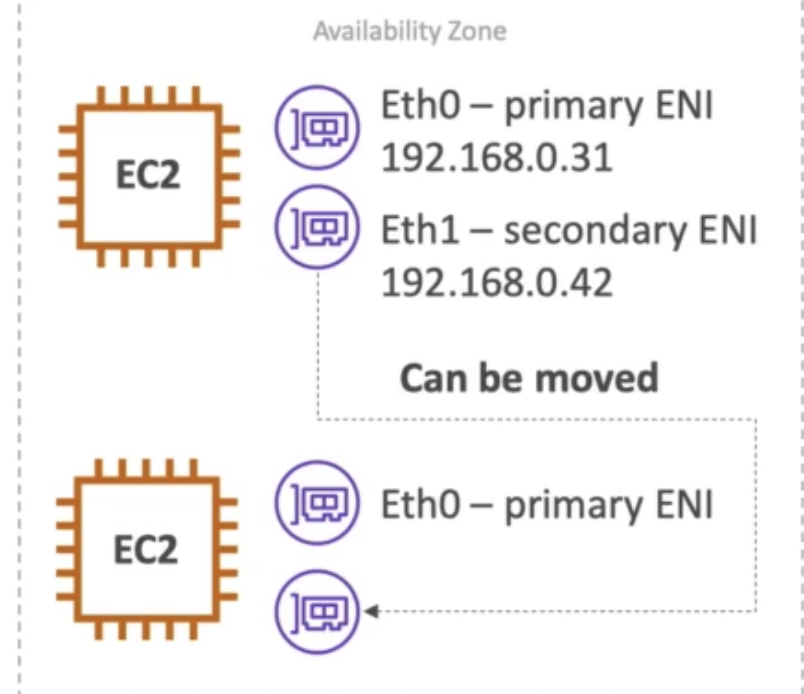
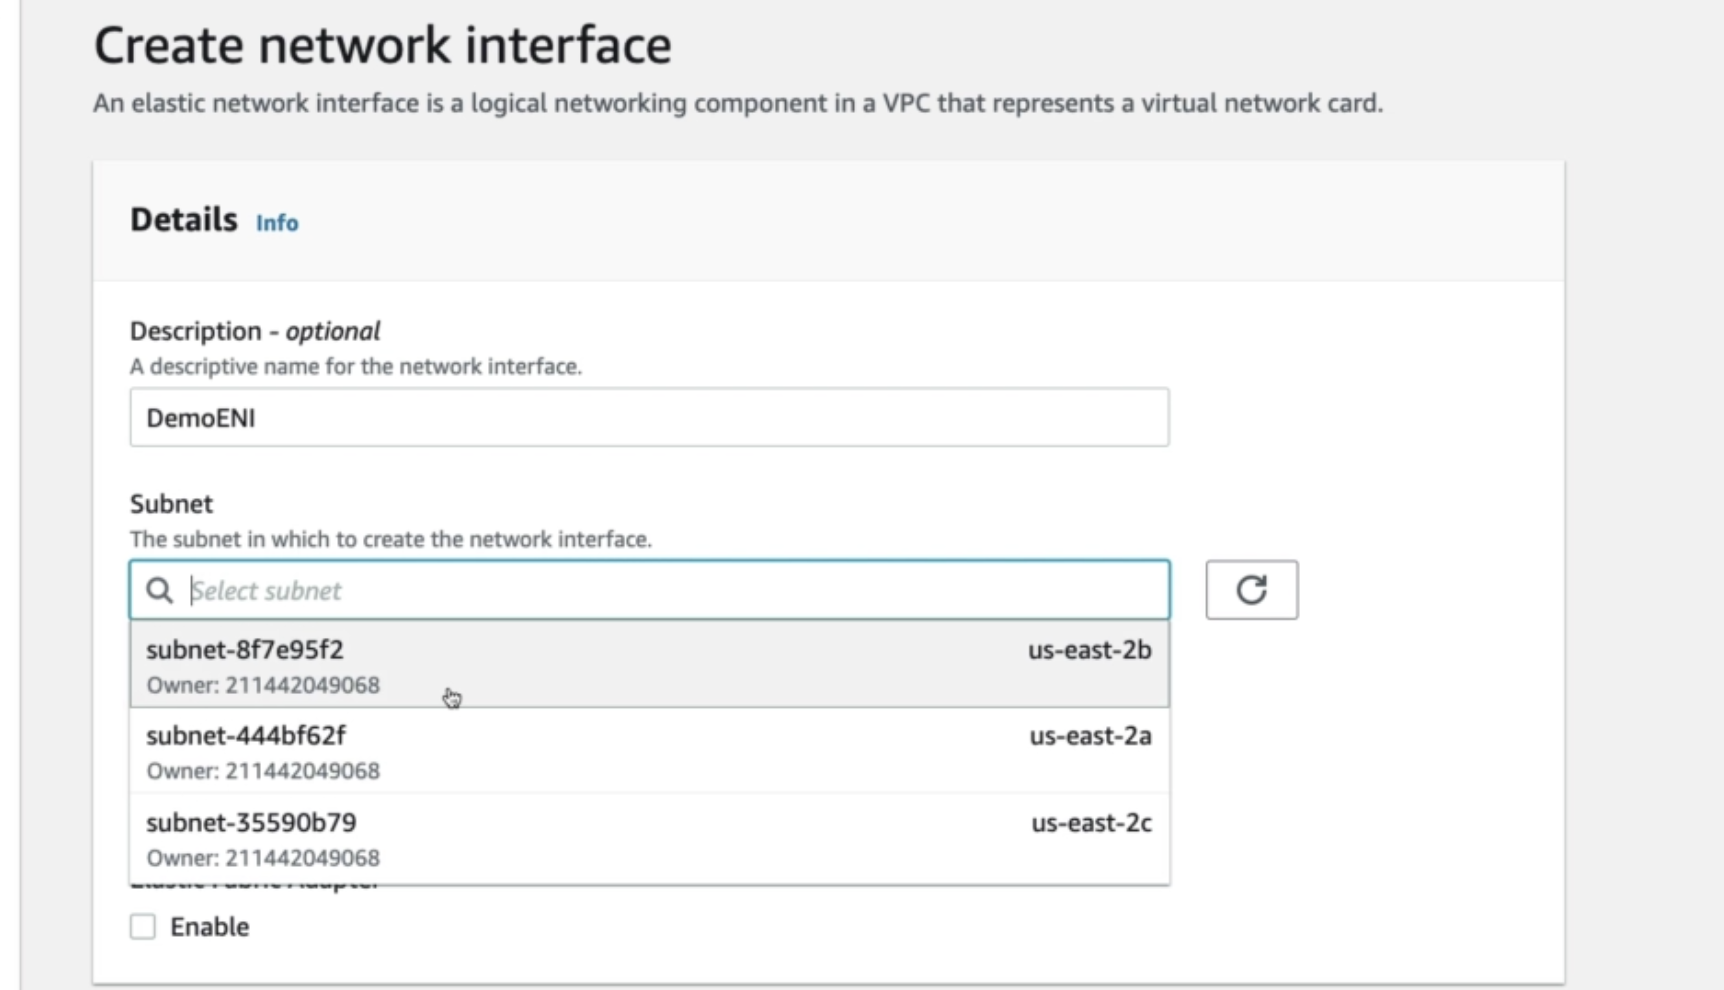



## EC2 Hibernate

* We know that if we stop, terminate instances:

1. Stop: data on disk is kept intact
2. Terminate: any ebs volumes also setup to be destroyed is lost


* On start, the following happens. 

with Ec2 hibernate:

* RAM is perserved
* instance boot is much faster
* Under the hood: RAM state is written to a file on EBS
* Root EBS volume is encrypted

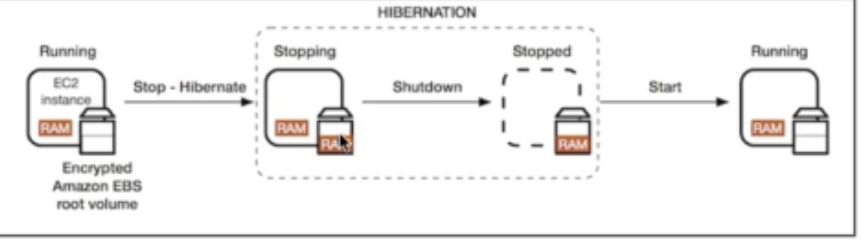


Use-Cases:
* Long-running processes
* saving the RAM state
* services that take a lot of time to start

#### good to know:

* Supported instance familes are listed
* Instance RAM size must be less than 150
* Not supported for bare metal instances 
* Must be an EBS volume 

